# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress,pearsonr

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?units=Metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | hualmay
Processing Record 3 of Set 1 | may pen
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | leshukonskoye
Processing Record 6 of Set 1 | valparaiso
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | mitsamiouli
Processing Record 9 of Set 1 | hobart
Processing Record 10 of Set 1 | provideniya
Processing Record 11 of Set 1 | nikolskoye
Processing Record 12 of Set 1 | burica
City not found. Skipping...
Processing Record 13 of Set 1 | egvekinot
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | yumen
Processing Record 16 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 17 of Set 1 | saleaula
City not found. Skipping...
Processing Record 18 of Set 1 | castro
Processing Record 19 of Set 1 | upernavik
Processing Record 20 of Set 1 | rikitea
Processing Record 21 of Set 

Processing Record 34 of Set 4 | bom jesus
Processing Record 35 of Set 4 | eureka
Processing Record 36 of Set 4 | chuy
Processing Record 37 of Set 4 | solovetskiy
City not found. Skipping...
Processing Record 38 of Set 4 | gazojak
Processing Record 39 of Set 4 | moose factory
Processing Record 40 of Set 4 | saldanha
Processing Record 41 of Set 4 | alofi
Processing Record 42 of Set 4 | basco
Processing Record 43 of Set 4 | arraial do cabo
Processing Record 44 of Set 4 | lahij
Processing Record 45 of Set 4 | zaysan
Processing Record 46 of Set 4 | morondava
Processing Record 47 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 48 of Set 4 | canberra
Processing Record 49 of Set 4 | kysyl-syr
Processing Record 0 of Set 5 | rawson
Processing Record 1 of Set 5 | is
City not found. Skipping...
Processing Record 2 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 3 of Set 5 | mizdah
Processing Record 4 of Set 5 | jamestown
Processing Record 5 of Set 5 | babati
P

Processing Record 27 of Set 8 | karkaralinsk
City not found. Skipping...
Processing Record 28 of Set 8 | kaitangata
Processing Record 29 of Set 8 | chagda
City not found. Skipping...
Processing Record 30 of Set 8 | klaksvik
Processing Record 31 of Set 8 | torata
Processing Record 32 of Set 8 | austin
Processing Record 33 of Set 8 | mineiros
Processing Record 34 of Set 8 | churapcha
Processing Record 35 of Set 8 | molchanovo
Processing Record 36 of Set 8 | santander
Processing Record 37 of Set 8 | eregli
Processing Record 38 of Set 8 | husavik
Processing Record 39 of Set 8 | saint george
Processing Record 40 of Set 8 | guasdualito
Processing Record 41 of Set 8 | galgani
City not found. Skipping...
Processing Record 42 of Set 8 | shimoda
Processing Record 43 of Set 8 | walvis bay
Processing Record 44 of Set 8 | andenes
Processing Record 45 of Set 8 | amderma
City not found. Skipping...
Processing Record 46 of Set 8 | taperoa
Processing Record 47 of Set 8 | leeton
Processing Record 48 of 

Processing Record 13 of Set 12 | menongue
Processing Record 14 of Set 12 | moron
Processing Record 15 of Set 12 | hendijan
City not found. Skipping...
Processing Record 16 of Set 12 | inyonga
Processing Record 17 of Set 12 | garhi khairo
Processing Record 18 of Set 12 | rodionovo-nesvetayskaya
Processing Record 19 of Set 12 | faya
Processing Record 20 of Set 12 | komsomolskiy
Processing Record 21 of Set 12 | alvdal
Processing Record 22 of Set 12 | dingle
Processing Record 23 of Set 12 | asfi
Processing Record 24 of Set 12 | rennes
Processing Record 25 of Set 12 | alta floresta
Processing Record 26 of Set 12 | san juan
Processing Record 27 of Set 12 | port shepstone
Processing Record 28 of Set 12 | codrington
Processing Record 29 of Set 12 | sangar
Processing Record 30 of Set 12 | korla
Processing Record 31 of Set 12 | dubrovnik
Processing Record 32 of Set 12 | yenagoa
Processing Record 33 of Set 12 | jiaocheng
Processing Record 34 of Set 12 | kathu
Processing Record 35 of Set 12 | nizh

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          549
Lat           549
Lng           549
Max Temp      549
Humidity      549
Cloudiness    549
Wind Speed    549
Country       549
Date          549
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hermanus,-34.4187,19.2345,19.33,82,0,5.14,ZA,1670613556
1,hualmay,-11.0964,-77.6139,22.18,70,22,4.53,PE,1670613556
2,may pen,17.9645,-77.2451,30.56,48,35,2.61,JM,1670613557
3,yellowknife,62.4560,-114.3525,-17.71,78,100,3.60,CA,1670613557
4,leshukonskoye,64.8989,45.7622,-12.32,94,100,3.84,RU,1670613558


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,19.33,82,0,5.14,ZA,1670613556
1,hualmay,-11.0964,-77.6139,22.18,70,22,4.53,PE,1670613556
2,may pen,17.9645,-77.2451,30.56,48,35,2.61,JM,1670613557
3,yellowknife,62.4560,-114.3525,-17.71,78,100,3.60,CA,1670613557
4,leshukonskoye,64.8989,45.7622,-12.32,94,100,3.84,RU,1670613558


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

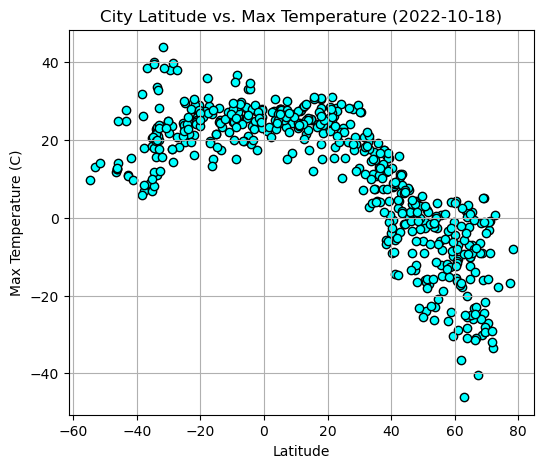

In [8]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize= (6,5))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature (2022-10-18)")
plt.grid()
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", facecolors="aqua", edgecolors="black")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

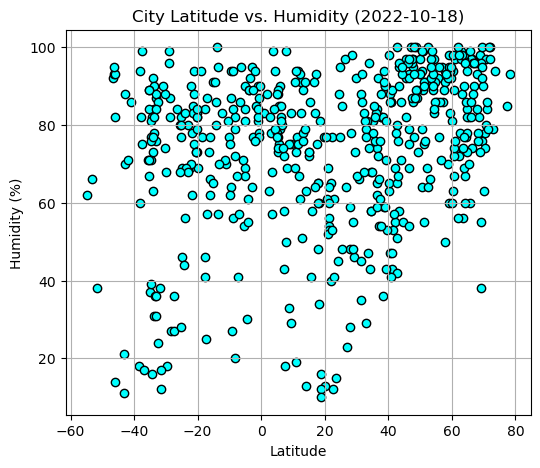

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize= (6,5))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.grid()
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", facecolors="aqua", edgecolors="black")


# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

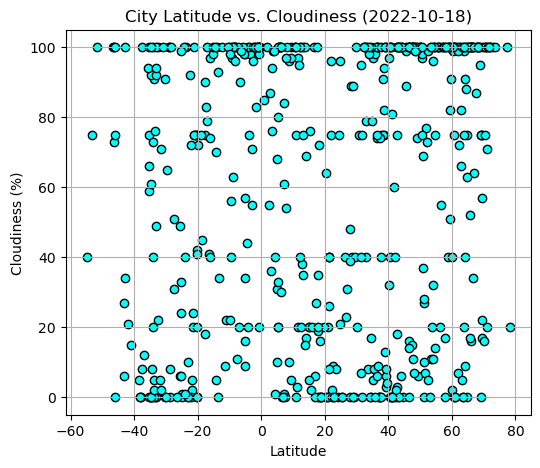

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize= (6,5))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.grid()
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", facecolors="aqua", edgecolors="black")


# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

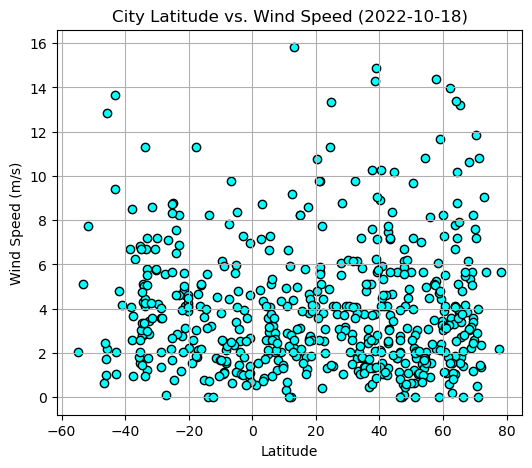

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize= (6,5))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.grid()
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", facecolors="aqua", edgecolors="black")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] > 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,may pen,17.9645,-77.2451,30.56,48,35,2.61,JM,1670613557
3,yellowknife,62.4560,-114.3525,-17.71,78,100,3.60,CA,1670613557
4,leshukonskoye,64.8989,45.7622,-12.32,94,100,3.84,RU,1670613558
9,provideniya,64.3833,-173.3000,-2.25,77,88,10.17,RU,1670613560
10,nikolskoye,59.7035,30.7861,-1.06,92,91,3.46,RU,1670613560


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hermanus,-34.4187,19.2345,19.33,82,0,5.14,ZA,1670613556
1,hualmay,-11.0964,-77.6139,22.18,70,22,4.53,PE,1670613556
5,valparaiso,-33.0393,-71.6273,28.13,76,0,7.20,CL,1670613408
6,ushuaia,-54.8000,-68.3000,9.81,62,40,2.06,AR,1670613559
7,mitsamiouli,-11.3847,43.2844,27.20,71,9,1.77,KM,1670613560


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7433876875762551


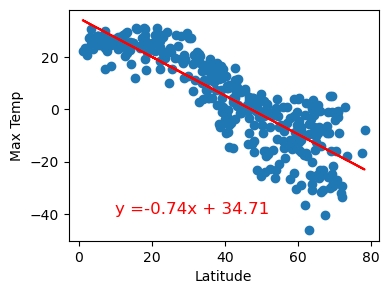

In [51]:
# Linear regression on Northern Hemisphere
temp_northern_hemi = northern_hemi_df["Max Temp"]
lat_northern_hemi = northern_hemi_df["Lat"]

temp_slope, temp_int, temp_r, temp_p, temp_std_err = linregress(lat_northern_hemi, temp_northern_hemi)
temp_fit = temp_slope * lat_northern_hemi + temp_int
temp_line = "y =" + str(round(temp_slope, 2)) + "x + " + str(round(temp_int, 2))

correlation_northern_hemi = pearsonr(lat_northern_hemi, temp_northern_hemi)

plt.figure(figsize= (4,3))
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(temp_line, (10, -40), fontsize = 12, color = "red")

plt.scatter(lat_northern_hemi, temp_northern_hemi)
plt.plot(lat_northern_hemi, temp_fit, color ="red")
print(f"The r-value is: {temp_r**2}")
plt.show()

The r-value is: 0.15164268333982145


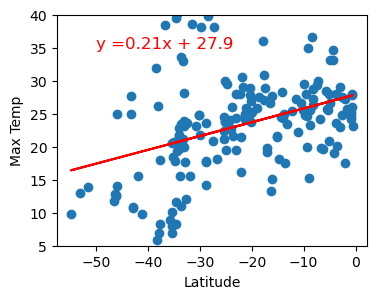

In [54]:
## Linear regression on Southern Hemisphere
temp_southern_hemi = southern_hemi_df["Max Temp"]
lat_southern_hemi = southern_hemi_df["Lat"]

temp_slope, temp_int, temp_r, temp_p, temp_std_err = linregress(lat_southern_hemi, temp_southern_hemi)
temp_fit = temp_slope * lat_southern_hemi + temp_int
temp_line = "y =" + str(round(temp_slope, 2)) + "x + " + str(round(temp_int, 2))

correlation_southern_hemi = pearsonr(lat_southern_hemi, temp_southern_hemi)

plt.figure(figsize= (4,3))
plt.ylim(5, 40)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(temp_line, (-50, 35), fontsize = 12, color = "red")

plt.scatter(lat_southern_hemi, temp_southern_hemi)
plt.plot(lat_southern_hemi, temp_fit, color ="red")
print(f"The r-value is: {temp_r**2}")
plt.show()

**Discussion about the linear relationship:** The northern hempishere shows a negative correlation between latitude and max temperature. The southern hemishphere shows a small positive correlation between latitude and max temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.11627130738430096


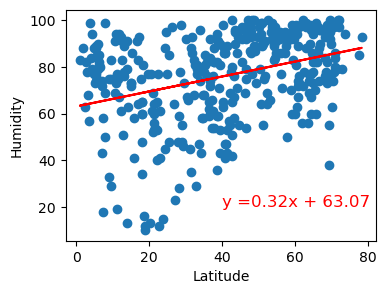

In [57]:
# Northern Hemisphere
humidity_northern_hemi = northern_hemi_df["Humidity"]
lat_northern_hemi = northern_hemi_df["Lat"]

temp_slope, temp_int, temp_r, temp_p, temp_std_err = linregress(lat_northern_hemi, humidity_northern_hemi)
temp_fit = temp_slope * lat_northern_hemi + temp_int
temp_line = "y =" + str(round(temp_slope, 2)) + "x + " + str(round(temp_int, 2))

correlation_2_northern_hemi = pearsonr(lat_northern_hemi, humidity_northern_hemi)

plt.figure(figsize= (4,3))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(temp_line, (40, 20), fontsize = 12, color = "red")

plt.scatter(lat_northern_hemi, humidity_northern_hemi)
plt.plot(lat_northern_hemi, temp_fit, color ="red")
print(f"The r-value is: {temp_r**2}")
plt.show()

The r-value is: 0.03867453718102262


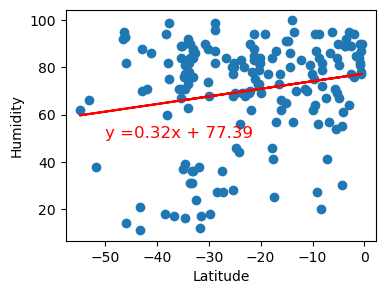

In [60]:
# Southern Hemisphere
humidity_southern_hemi = southern_hemi_df["Humidity"]
lat_southern_hemi = southern_hemi_df["Lat"]

temp_slope, temp_int, temp_r, temp_p, temp_std_err = linregress(lat_southern_hemi, humidity_southern_hemi)
temp_fit = temp_slope * lat_southern_hemi + temp_int
temp_line = "y =" + str(round(temp_slope, 2)) + "x + " + str(round(temp_int, 2))

correlation_2_southern_hemi = pearsonr(lat_southern_hemi, humidity_southern_hemi)

plt.figure(figsize= (4,3))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(temp_line, (-50, 50), fontsize = 12, color = "red")

plt.scatter(lat_southern_hemi, humidity_southern_hemi)
plt.plot(lat_southern_hemi, temp_fit, color ="red")
print(f"The r-value is: {temp_r**2}")
plt.show()

**Discussion about the linear relationship:** The northern hemisphere shows a very slight positive correlation between latitiude and humidity. There is almost zero correlation between the two in the southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.046425449207170955


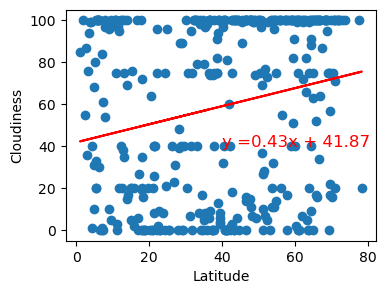

In [63]:
# Northern Hemisphere
cloudiness_northern_hemi = northern_hemi_df["Cloudiness"]
lat_northern_hemi = northern_hemi_df["Lat"]

temp_slope, temp_int, temp_r, temp_p, temp_std_err = linregress(lat_northern_hemi, cloudiness_northern_hemi)
temp_fit = temp_slope * lat_northern_hemi + temp_int
temp_line = "y =" + str(round(temp_slope, 2)) + "x + " + str(round(temp_int, 2))

correlation_3_northern_hemi = pearsonr(lat_northern_hemi, cloudiness_northern_hemi)

plt.figure(figsize= (4,3))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(temp_line, (40, 40), fontsize = 12, color = "red")

plt.scatter(lat_northern_hemi, cloudiness_northern_hemi)
plt.plot(lat_northern_hemi, temp_fit, color ="red")
print(f"The r-value is: {temp_r**2}")
plt.show()

The r-value is: 0.08437134540938744


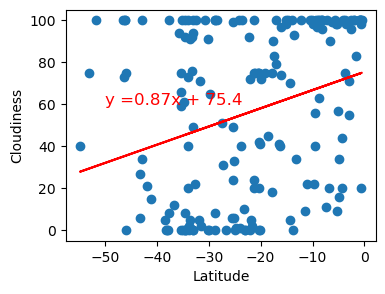

In [66]:
# Southern Hemisphere
cloudiness_southern_hemi = southern_hemi_df["Cloudiness"]
lat_southern_hemi = southern_hemi_df["Lat"]

temp_slope, temp_int, temp_r, temp_p, temp_std_err = linregress(lat_southern_hemi, cloudiness_southern_hemi)
temp_fit = temp_slope * lat_southern_hemi + temp_int
temp_line = "y =" + str(round(temp_slope, 2)) + "x + " + str(round(temp_int, 2))

correlation_3_southern_hemi = pearsonr(lat_southern_hemi, cloudiness_southern_hemi)

plt.figure(figsize= (4,3))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(temp_line, (-50, 60), fontsize = 12, color = "red")

plt.scatter(lat_southern_hemi, cloudiness_southern_hemi)
plt.plot(lat_southern_hemi, temp_fit, color ="red")
print(f"The r-value is: {temp_r**2}")
plt.show()

**Discussion about the linear relationship:** There is a small positive correlation between latitiude and cloudiness in the northern and southern hemispheres.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.003862590038983182


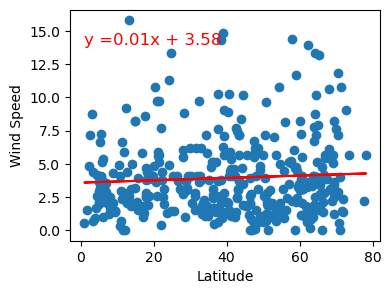

In [68]:
# Northern Hemisphere
windspeed_northern_hemi = northern_hemi_df["Wind Speed"]
lat_northern_hemi = northern_hemi_df["Lat"]

temp_slope, temp_int, temp_r, temp_p, temp_std_err = linregress(lat_northern_hemi, windspeed_northern_hemi)
temp_fit = temp_slope * lat_northern_hemi + temp_int
temp_line = "y =" + str(round(temp_slope, 2)) + "x + " + str(round(temp_int, 2))

correlation_4_northern_hemi = pearsonr(lat_northern_hemi, windspeed_northern_hemi)

plt.figure(figsize= (4,3))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(temp_line, (1, 14), fontsize = 12, color = "red")

plt.scatter(lat_northern_hemi, windspeed_northern_hemi)
plt.plot(lat_northern_hemi, temp_fit, color ="red")
print(f"The r-value is: {temp_r**2}")
plt.show()

The r-value is: 0.04788321686542206


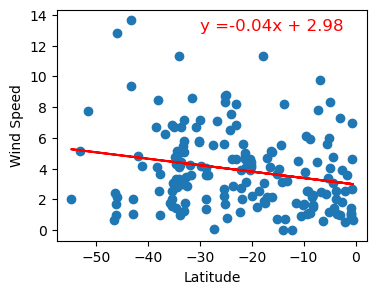

In [71]:
# Southern Hemisphere
windspeed_southern_hemi = southern_hemi_df["Wind Speed"]
lat_southern_hemi = southern_hemi_df["Lat"]

temp_slope, temp_int, temp_r, temp_p, temp_std_err = linregress(lat_southern_hemi, windspeed_southern_hemi)
temp_fit = temp_slope * lat_southern_hemi + temp_int
temp_line = "y =" + str(round(temp_slope, 2)) + "x + " + str(round(temp_int, 2))

correlation_4_southern_hemi = pearsonr(lat_southern_hemi, windspeed_southern_hemi)

plt.figure(figsize= (4,3))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(temp_line, (-30, 13), fontsize = 12, color = "red")

plt.scatter(lat_southern_hemi, windspeed_southern_hemi)
plt.plot(lat_southern_hemi, temp_fit, color ="red")
print(f"The r-value is: {temp_r**2}")
plt.show()

**Discussion about the linear relationship:** There is almost zero correlation between latitude and wind spped in the northern hemisphere. There is a small negative correlaton between tlatitude and wind speed in the southern hemisphere.